In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import json

In [7]:
edges = pd.read_csv('facebook_large/musae_facebook_edges.csv')
G = nx.Graph()
G.add_edges_from(edges.values)

In [8]:
with open('facebook_large/musae_facebook_features.json') as f:
    features = json.load(f)

In [9]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 22470
Number of edges: 171002


In [10]:
# Degree Distribution
degrees = [deg for _, deg in G.degree()]
print(f"Average degree: {np.mean(degrees):.2f}")
print(f"Median degree: {np.median(degrees):.2f}")


Average degree: 15.22
Median degree: 7.00


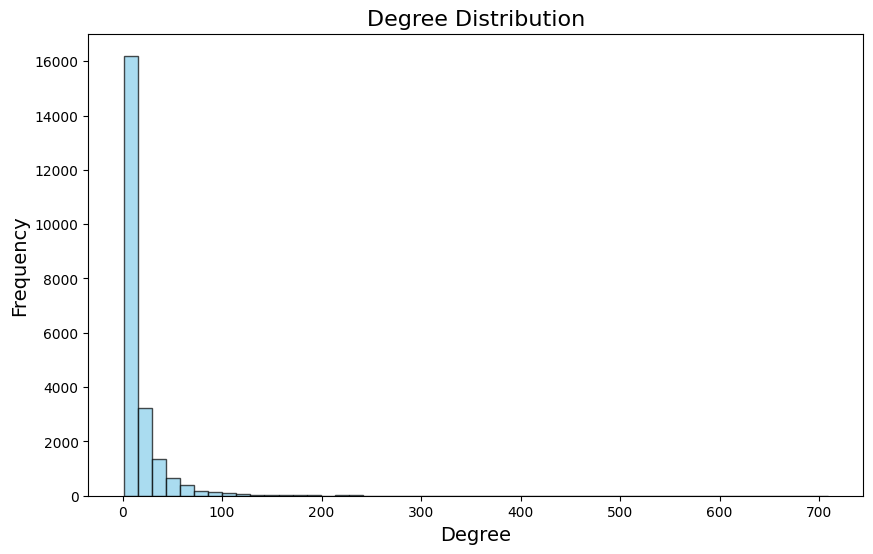

In [11]:
# Plot degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Degree Distribution", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [12]:
avg_clustering = nx.average_clustering(G)
print(f"Average clustering coefficient: {avg_clustering:.4f}")


Average clustering coefficient: 0.3597


In [13]:
# Connected Components
num_components = nx.number_connected_components(G)
largest_cc = max(nx.connected_components(G), key=len)
print(f"Number of connected components: {num_components}")
print(f"Size of largest connected component: {len(largest_cc)}")

Number of connected components: 1
Size of largest connected component: 22470


### Sample sub graphs

In [16]:
import networkx as nx
import random

def random_walk_sampling_subgraph(G, num_nodes):
    sampled_nodes = set()
    start_node = random.choice(list(G.nodes))  # Start from a random node
    current_node = start_node

    while len(sampled_nodes) < num_nodes:
        sampled_nodes.add(current_node)
        neighbors = list(G.neighbors(current_node))
        if neighbors:
            current_node = random.choice(neighbors)
        else:
            current_node = random.choice(list(G.nodes))  # Restart if stuck

    # Create subgraph with sampled nodes
    G_sub = G.subgraph(sampled_nodes).copy()
    
    return G_sub


In [28]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_pretty_graph(G_sub):
    plt.figure(figsize=(12, 12))
    
    # Spring layout for better visualization
    pos = nx.spring_layout(G_sub, seed=42)  # Seed ensures reproducibility
    
    # Drawing the graph with simpler styling for clarity
    nx.draw(
        G_sub,
        pos,
        with_labels=False,  # Hide node labels for better visual clarity
        node_size=10,  # Small node size to avoid overlap
        node_color="blue",  # Light blue for nodes
        edge_color="gray",  # Gray edges for subtle connections
        alpha=0.6,  # Slight transparency to reduce clutter
        width=0.7,  # Slightly thinner edges for cleaner look
    )
    
    # Title of the graph
    plt.title("Graph Visualization", fontsize=16, fontweight="bold")
    
    # Hide axes for a cleaner view
    plt.axis('off')
    
    # Show the plot
    plt.show()


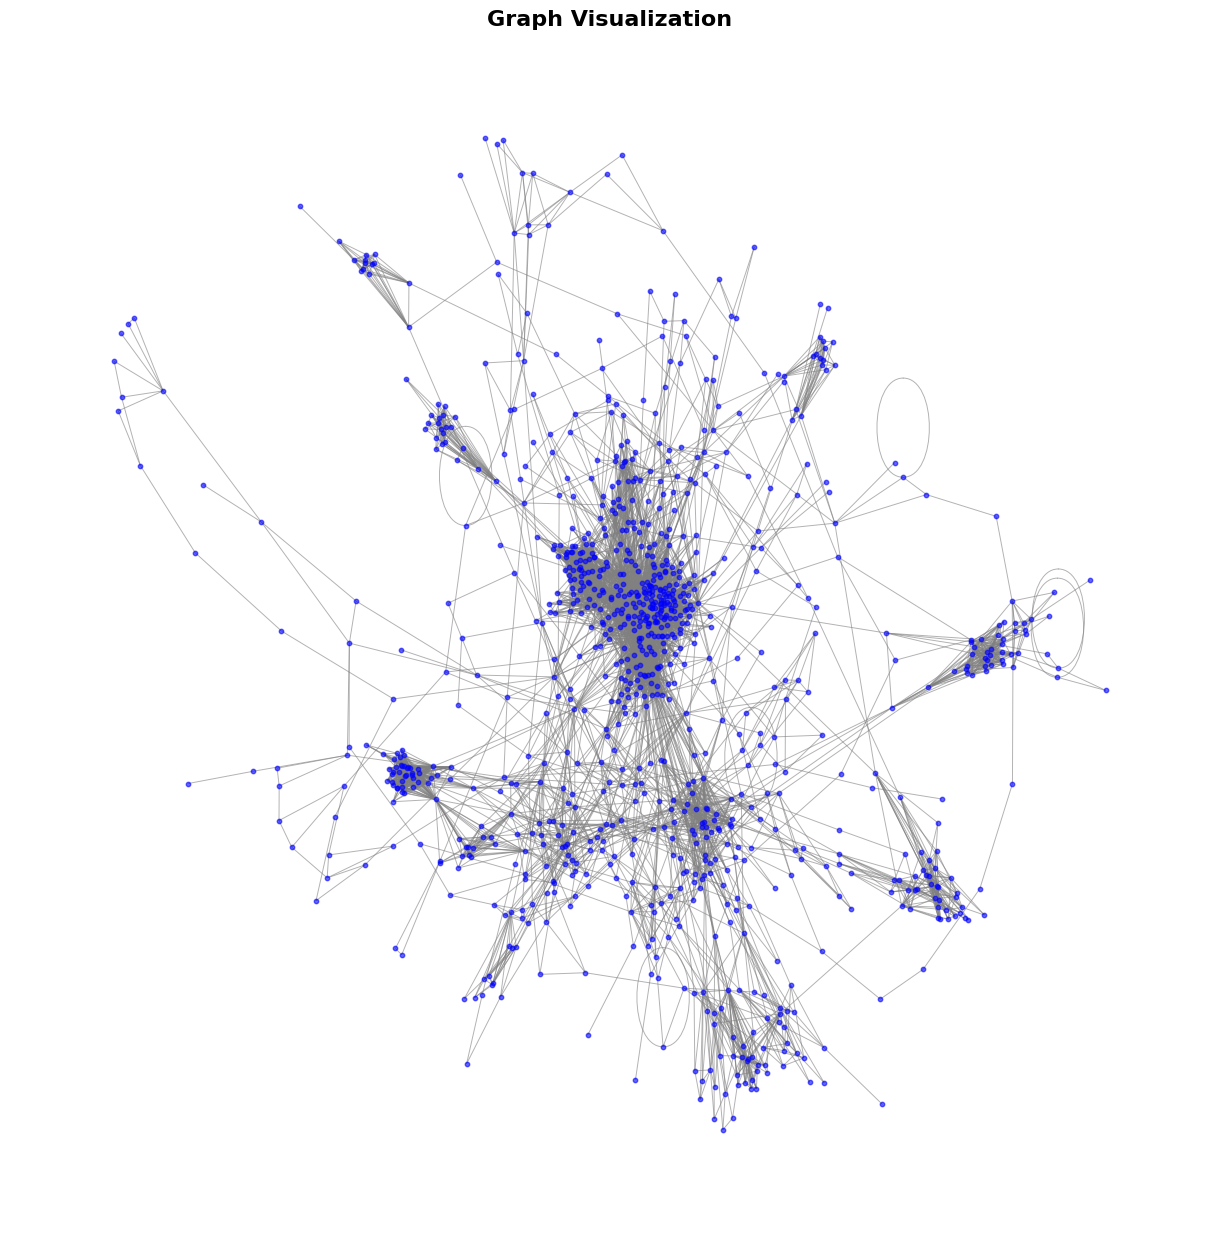

In [31]:
G_sub = random_walk_sampling_subgraph(G, num_nodes=1000)
plot_pretty_graph(G_sub)

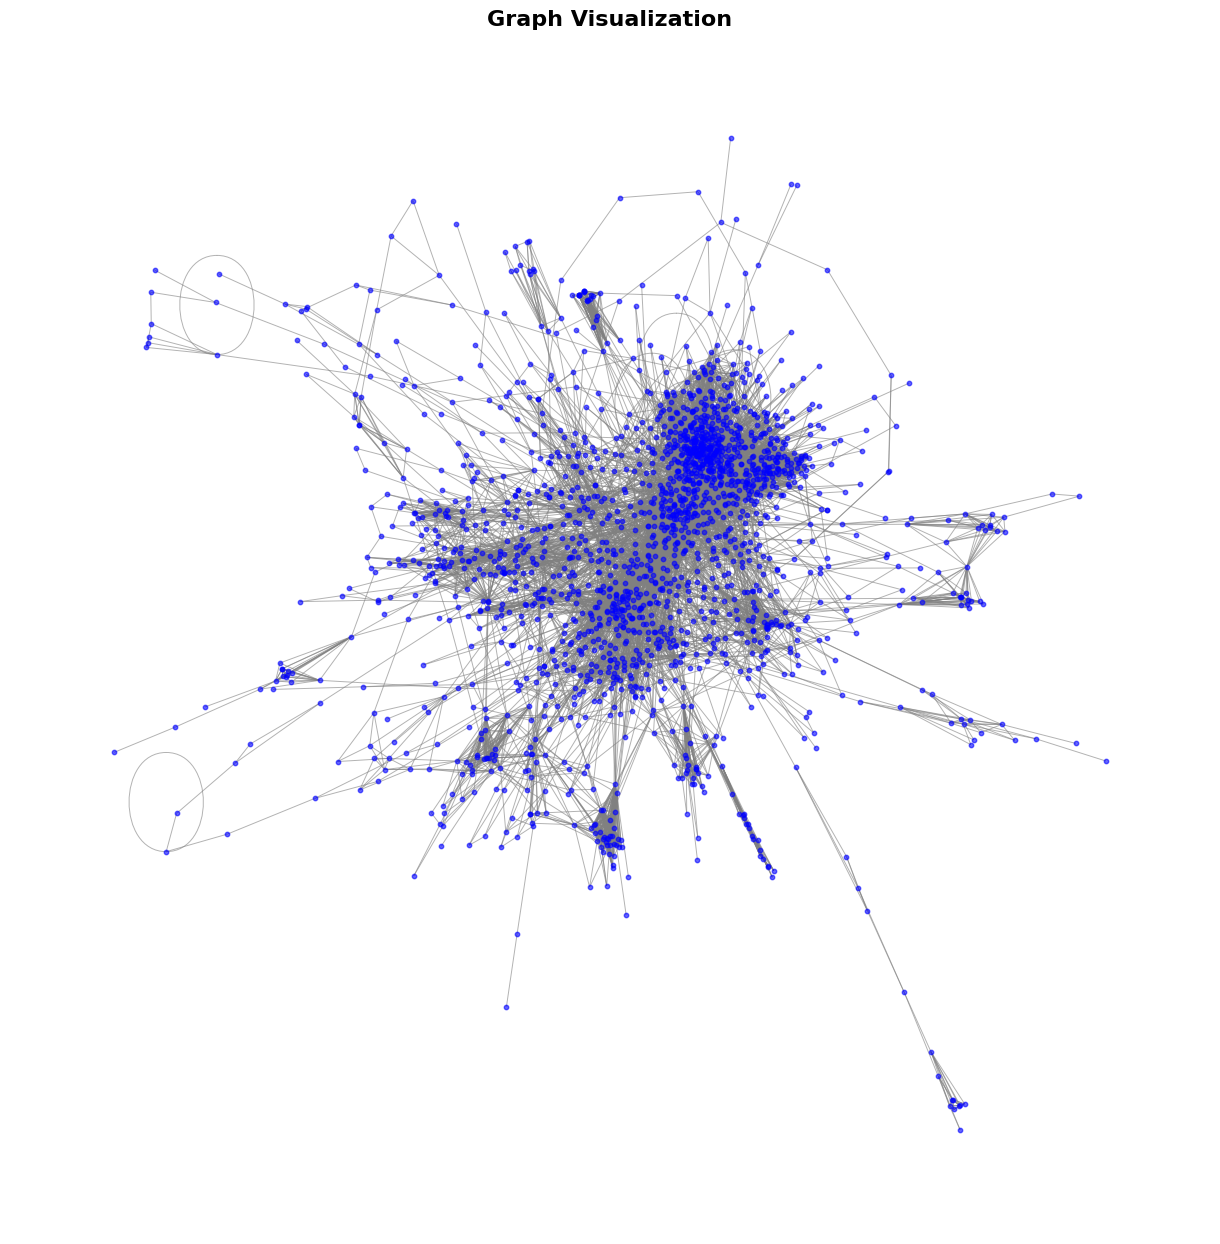

In [32]:
G_sub2 = random_walk_sampling_subgraph(G, num_nodes=2000)
plot_pretty_graph(G_sub2)

### EDA

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_distribution(G_sub):
    """
    Plot the degree distribution of the graph to observe if there are hubs (power-law distribution).
    
    Parameters:
    - G_sub: The subgraph to analyze (NetworkX Graph object).
    """
    # Get degree distribution
    degrees = [deg for node, deg in G_sub.degree()]
    
    # Plot degree distribution
    plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title("Degree Distribution", fontsize=16)
    plt.xlabel("Degree (Number of Connections)", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.show()


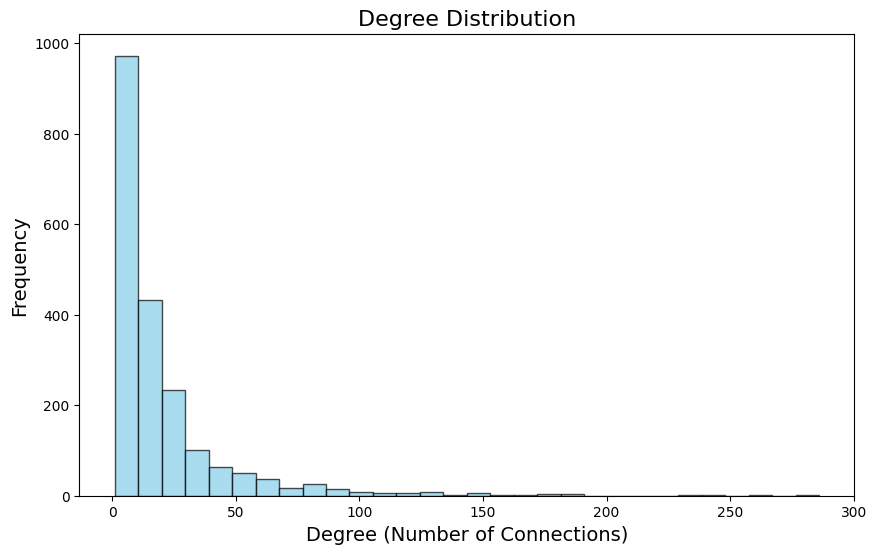

In [34]:
plot_degree_distribution(G_sub2)

The Degree Distribution histogram provides insights into the structural characteristics of the graph, particularly focusing on the number of connections (edges) each node (Facebook page)

The histogram has a long tail, with many nodes having low degree (a lot of pages with only a few connections) and a few nodes having very high degree (a small number of pages with many connections), the graph likely follows a power-law distribution. This is a typical characteristic of "scale-free networks."
In scale-free networks, most nodes have only a few connections (low degree), while a small number of nodes (hubs) have a very high degree, meaning they are highly connected. This suggests that some Facebook pages are extremely influential and well-connected (hubs), while most pages are not.

In [36]:
def connected_components_analysis(G_sub):

    # Find all connected components
    components = list(nx.connected_components(G_sub))
    
    # Find the largest connected component
    largest_component = max(components, key=len)
    
    # Calculate the size of the largest component relative to the whole graph
    largest_component_size = len(largest_component)
    total_nodes = len(G_sub.nodes())
    component_ratio = largest_component_size / total_nodes

    # Print insights
    print(f"Total nodes in the graph: {total_nodes}")
    print(f"Size of the largest connected component: {largest_component_size}")
    print(f"Ratio of the largest connected component to the whole graph: {component_ratio:.2f}")

    # Plot the largest connected component subgraph
    G_largest = G_sub.subgraph(largest_component)
    
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G_largest, seed=42)
    nx.draw(G_largest, pos, node_size=50, node_color="lightblue", edge_color="gray", alpha=0.6)
    plt.title(f"Largest Connected Component - {largest_component_size} nodes", fontsize=16)
    plt.axis('off')
    plt.show()


Total nodes in the graph: 2000
Size of the largest connected component: 2000
Ratio of the largest connected component to the whole graph: 1.00


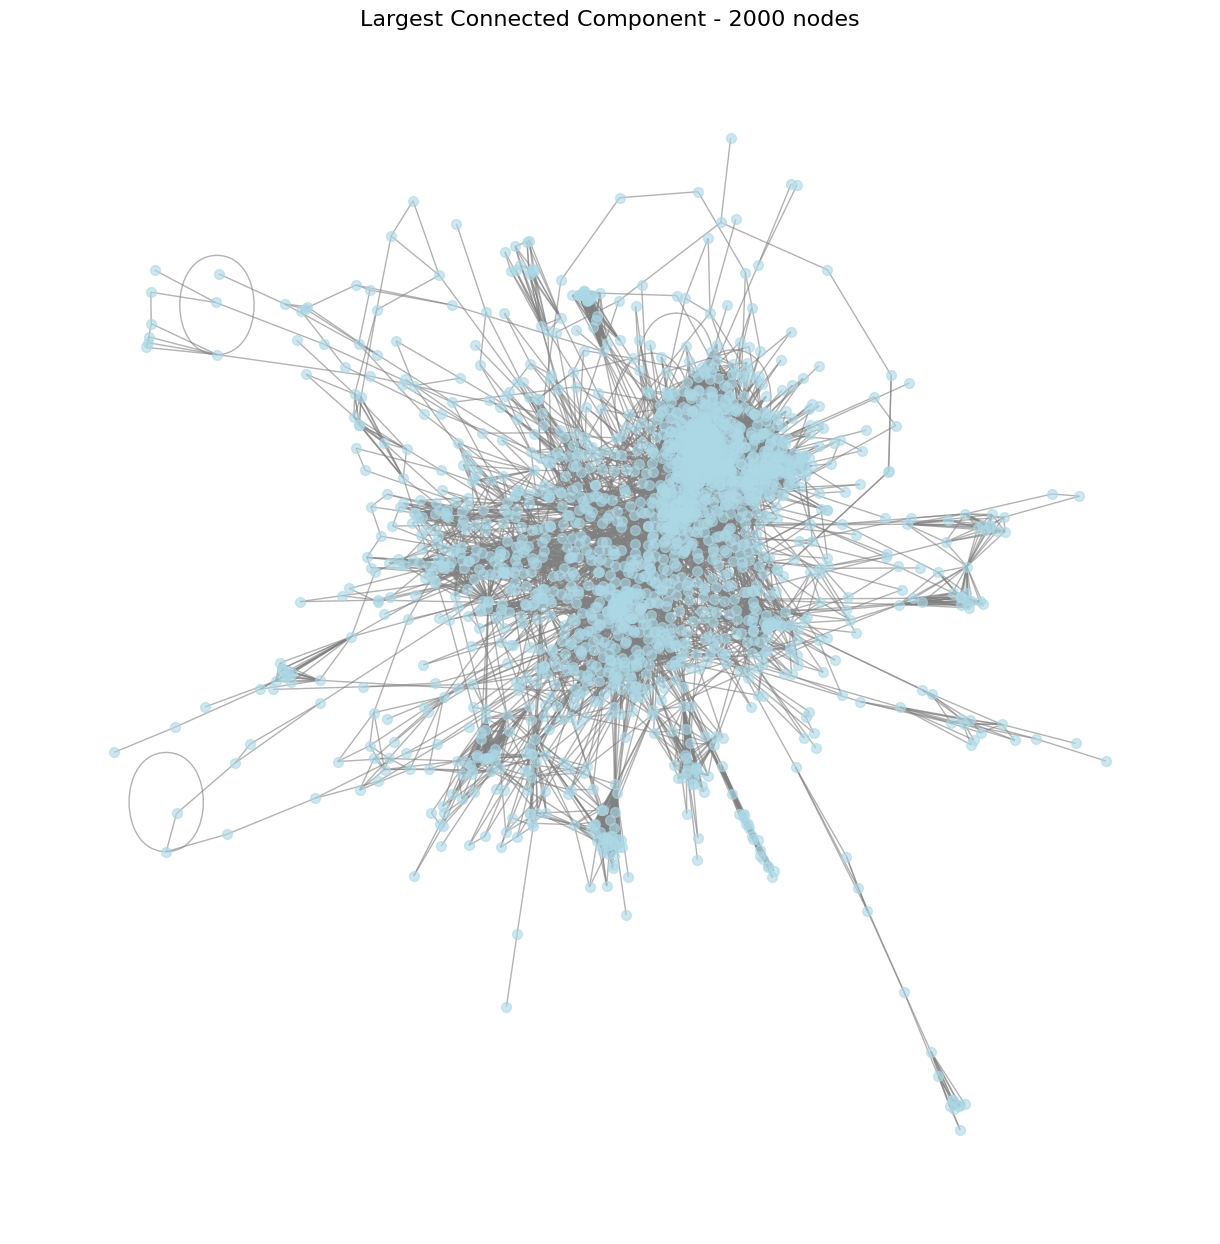

In [37]:
connected_components_analysis(G_sub2)

In [38]:
def clustering_coefficient_analysis(G_sub):

    # Compute the average clustering coefficient
    avg_clustering_coeff = nx.average_clustering(G_sub)
    
    # Print the result
    print(f"Average Clustering Coefficient: {avg_clustering_coeff:.4f}")
    
    # Optionally, plot the distribution of clustering coefficients
    clustering_coeffs = list(nx.clustering(G_sub).values())
    
    plt.figure(figsize=(10, 6))
    plt.hist(clustering_coeffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title("Clustering Coefficient Distribution", fontsize=16)
    plt.xlabel("Clustering Coefficient", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.show()


Average Clustering Coefficient: 0.4312


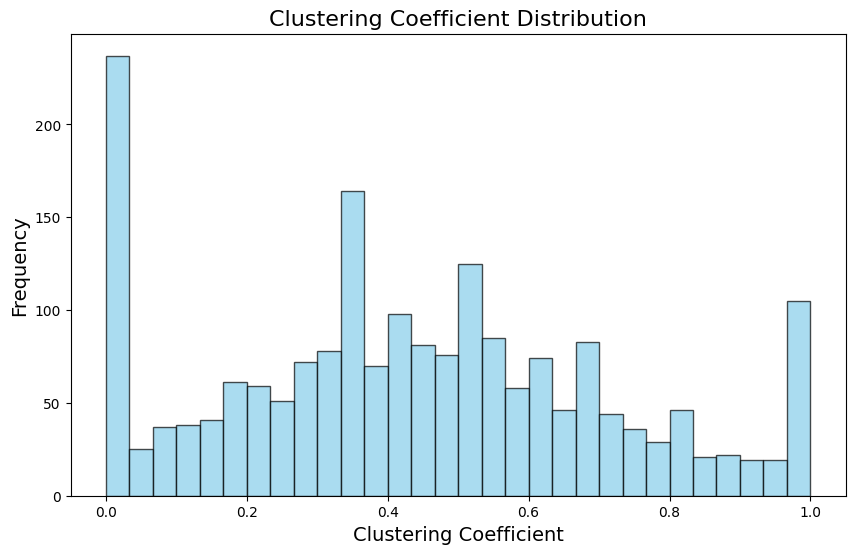

In [39]:
clustering_coefficient_analysis(G_sub2)

In [40]:
from networkx.algorithms.community import girvan_newman

# Detect communities using Girvan-Newman algorithm
communities = next(girvan_newman(G_sub2))
communities_dict = {node: idx for idx, community in enumerate(communities) for node in community}

# Add community information as node attributes
nx.set_node_attributes(G_sub2, communities_dict, 'community')


In [41]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G_sub2)

# Add centrality as a node attribute
nx.set_node_attributes(G_sub2, degree_centrality, 'degree_centrality')

# Rank nodes by degree centrality within each community
community_influence = {}
for node, community in communities_dict.items():
    if community not in community_influence:
        community_influence[community] = []
    community_influence[community].append((node, degree_centrality[node]))

# Sort nodes within each community by centrality
for community, nodes in community_influence.items():
    community_influence[community] = sorted(nodes, key=lambda x: x[1], reverse=True)

# Get the most influential page in each community
most_influential_pages = {community: nodes[0] for community, nodes in community_influence.items()}

# Get the overall most influential page
overall_most_influential = max(degree_centrality, key=degree_centrality.get)


C:\Users\aish0\AppData\Local\Temp\ipykernel_31960\1894004843.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.tab10), label="Community")


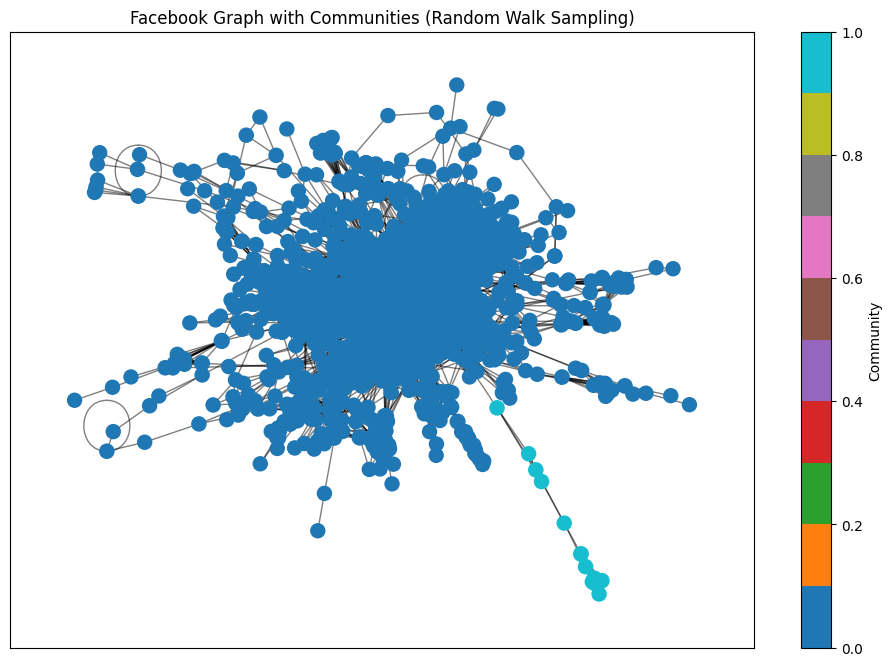

In [42]:
# Plot the graph with communities
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_sub2, seed=42)
colors = [communities_dict[node] for node in G_sub2.nodes()]
sizes = [100 + degree_centrality[node] * 2000 for node in G_sub2.nodes()]

nx.draw_networkx_nodes(G_sub2, pos, node_color=colors, node_size=sizes, cmap=plt.cm.tab10)
nx.draw_networkx_edges(G_sub2, pos, alpha=0.5)
plt.title("Facebook Graph with Communities (Random Walk Sampling)")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.tab10), label="Community")
plt.show()


C:\Users\aish0\AppData\Local\Temp\ipykernel_31960\3545378691.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.tab10), label="Community")


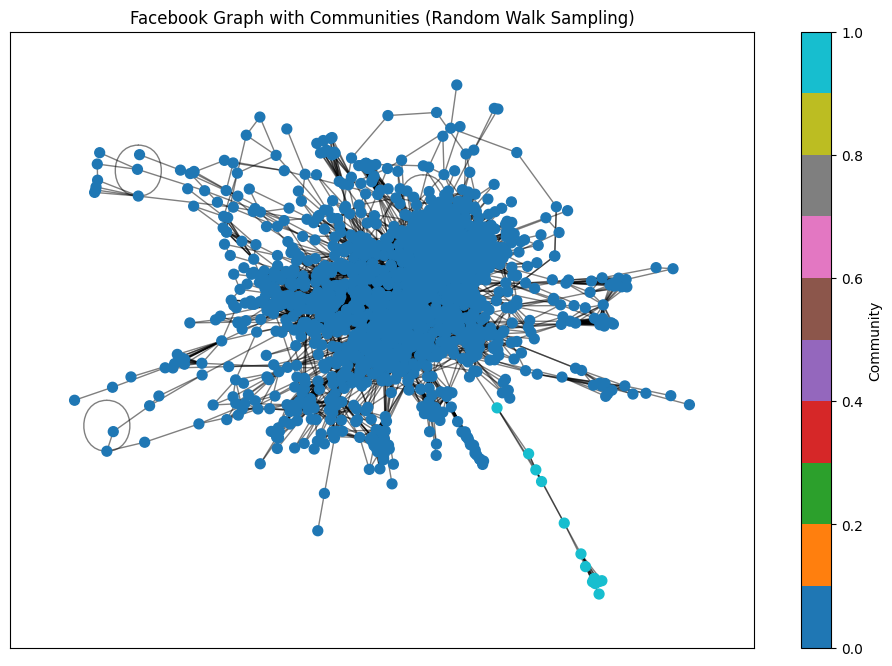

In [47]:
import matplotlib.pyplot as plt
import networkx as nx

# Plot the graph with communities
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_sub2, seed=42)

# Assign colors based on the community (already available in communities_dict)
colors = [communities_dict[node] for node in G_sub2.nodes()]

# Scale node sizes to smaller values (here, using a small factor to ensure visibility)
# Use a smaller factor for node size to make them smaller
sizes = [50 + degree_centrality[node] * 50 for node in G_sub2.nodes()]

# Draw nodes with smaller sizes
nx.draw_networkx_nodes(G_sub2, pos, node_color=colors, node_size=sizes, cmap=plt.cm.tab10)

# Draw edges with some transparency (alpha) to make the graph less cluttered
nx.draw_networkx_edges(G_sub2, pos, alpha=0.5)

# Add a title
plt.title("Facebook Graph with Communities (Random Walk Sampling)")

# Add a colorbar for community color mapping
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.tab10), label="Community")

# Show the plot
plt.show()


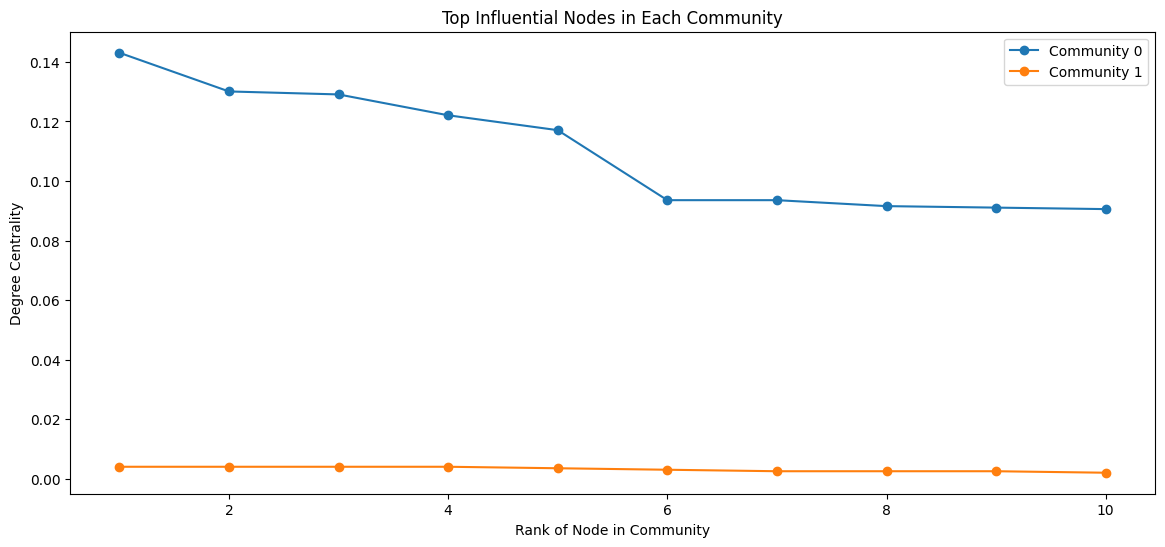

In [43]:
import pandas as pd

# Prepare data for visualization
community_data = []
for community, nodes in community_influence.items():
    for rank, (node, centrality) in enumerate(nodes[:10]):  # Top 10 nodes per community
        community_data.append((community, node, centrality, rank + 1))

df_community = pd.DataFrame(community_data, columns=['Community', 'Node', 'Centrality', 'Rank'])

# Plot top nodes in each community
plt.figure(figsize=(14, 6))
for community in df_community['Community'].unique():
    sub_df = df_community[df_community['Community'] == community]
    plt.plot(sub_df['Rank'], sub_df['Centrality'], marker='o', label=f"Community {community}")

plt.xlabel("Rank of Node in Community")
plt.ylabel("Degree Centrality")
plt.title("Top Influential Nodes in Each Community")
plt.legend()
plt.show()


1. Which page has the highest influence within each category/community?

In [44]:
for community, (node, centrality) in most_influential_pages.items():
    print(f"Community {community}: Node {node} with Centrality {centrality:.4f}")


Community 0: Node 16895 with Centrality 0.1431
Community 1: Node 14197 with Centrality 0.0040


2. Which community demonstrates the greatest overall influence?

In [45]:
community_avg_centrality = {
    community: sum([x[1] for x in nodes]) / len(nodes)
    for community, nodes in community_influence.items()
}
most_influential_community = max(community_avg_centrality, key=community_avg_centrality.get)
print(f"Most Influential Community: {most_influential_community} with Avg Centrality {community_avg_centrality[most_influential_community]:.4f}")


Most Influential Community: 0 with Avg Centrality 0.0100


3. What are the most influential pages in each community?

In [46]:
for community, nodes in community_influence.items():
    print(f"Community {community}: {nodes[:3]}")


Community 0: [(16895, 0.14307153576788392), (19743, 0.13006503251625812), (21729, 0.12906453226613307)]
Community 1: [(14197, 0.00400200100050025), (21525, 0.00400200100050025), (6779, 0.00400200100050025)]
